# K-means clustering

## Learning objectives
- implement K-means clustering from scratch

## The algorithm
# draw algorithm
- initialise k points in feature space representing the central point of a certain class
- until converged
    - assign each datapoint to the class represented by the nearest centroid
    - update the centroid position to the average feature vector of all of the datapoints currently assigned to initialise

## Implementation from scratch

### Make some fake data


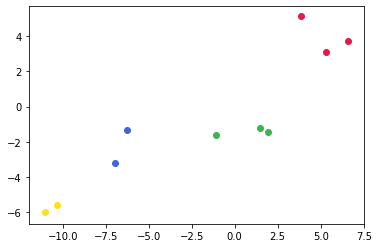

In [5]:
import sklearn.datasets
import matplotlib.pyplot as plt
from get_colors import colors

m = 10
n_features = 2
n_clusters = 4
X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=1.5)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

def show_data(X, Y, predictions=None, centroids=None):
    for i in range(n_clusters):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
        if centroids is not None:
            plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], s=300, marker='o')
    plt.show()

show_data(X, Y)

### Implement the algorithm





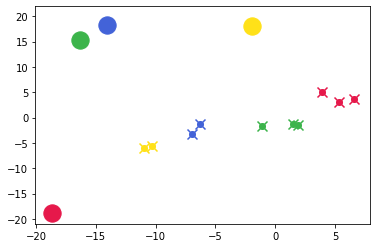

0
2
2
1
2
2
0
2
0
2


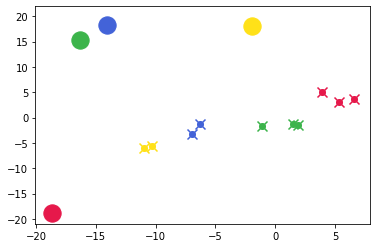

ValueError: could not broadcast input array from shape (3) into shape (2)

In [9]:
import numpy as np

centroids = np.random.uniform(-20, 20, (n_clusters, n_features))
show_data(X, Y, Y, centroids)

converged = False
while not converged:
    predictions = np.zeros(m)
    for idx, x in enumerate(X):
    # x = np.tile(X, (1, n_clusters))
        diff = x - centroids
        dists = np.linalg.norm(diff, axis=1) # take distance from each datapoint to each centroid
        closest_centroid_idx = np.argmin(dists)
        print(closest_centroid_idx)
        predictions[idx] = closest_centroid_idx
        print('norm:', np.linalg.norm(predictions - old_predictions))
        if np.linalg.norm(predictions - old_predictions) < 0.1:
            converged = True
        if idx == 10:
            converged = True
    
    show_data(X, Y, predictions, centroids)
    old_predictions = predictions

    for i in range(n_clusters):
        new_centroid = np.mean(X[predictions == i], axis=0)
        centroids[i] = new_centroid        

## Challenge